In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [19]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [20]:
def naive(p, q):
    d = np.zeros([len(p),len(q)])
    for i in range(0, len(p)):
        for j in range(0, len(q)):
            d[i,j] = np.sqrt((p[i,0]-q[j,0])**2 + (p[i,1]-q[j,1])**2)
    return d

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [21]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [22]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [42]:
def with_indices(p, q):
    d_ = p[rows.ravel()] - q[cols.ravel()]
    d = np.sqrt(d_[:,0]**2 + d_[:,1]**2)
    return d


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [43]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [44]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [45]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

38.9 ms ± 2.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(2

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(20, 80)
(

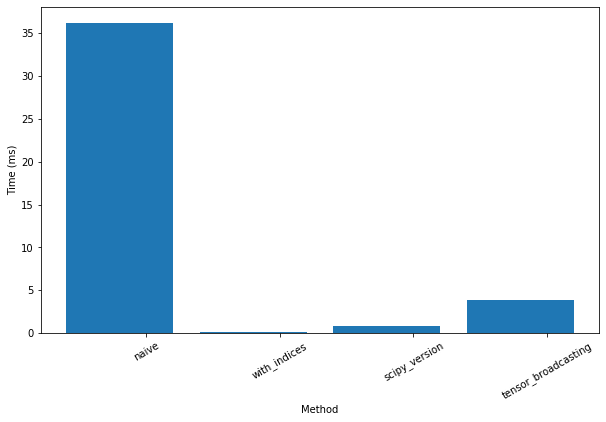

In [46]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()